# In the Name of God
## Deep Learning HW2 - Problem 1
## Sayed Pouria fatemi 400206324

In [ ]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt
import numpy as np

## Part (a)

In [ ]:
training_data = FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y),value=1))
)

test_data = FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



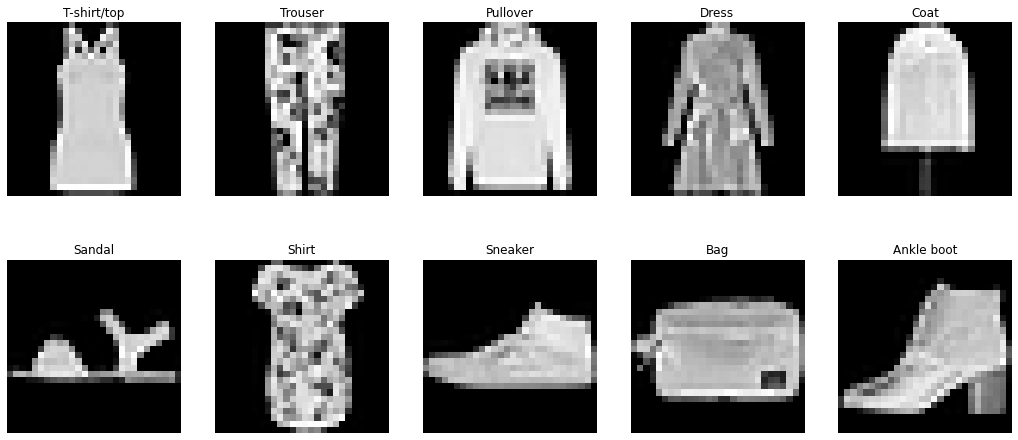

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(18, 8))

c = 0
for i in range(2):
  for j in range(5):  
    index_list = torch.nonzero(training_data.targets == c)
    index = int(index_list[torch.randint(len(index_list), (1,))][0])
    img, _ = training_data[index]
    ax[i][j].axis(False)
    ax[i][j].imshow(img.squeeze(), cmap="gray")
    ax[i][j].set_title(training_data.classes[c])
    c += 1

fig.show()

## Part (b)

In [ ]:
class NeuralNetwork():
  def __init__(self):
      self.input_size = 28 * 28
      self.output_size = 10
      self.num_layers = 4
      self.W = [0.1 * torch.randn((self.input_size, 30), requires_grad=True),
                0.1 * torch.randn((30, 20), requires_grad=True),
                0.1 * torch.randn((20, 20), requires_grad=True),
                0.1 * torch.randn((20, self.output_size), requires_grad=True)]
      self.b = [0.1 * torch.randn((1, 30), requires_grad=True),
                0.1 * torch.randn((1, 20), requires_grad=True),
                0.1 * torch.randn((1, 20), requires_grad=True),
                0.1 * torch.randn((1, self.output_size), requires_grad=True)]

  def model(self, xb):
    yb = self.flatten(xb)
    for i in range(self.num_layers):
        yb = yb @ self.W[i] + self.b[i]
        if i == self.num_layers - 1:
          yb = self.softmax(yb)
        else:
          yb = self.relu(yb)

    return yb
    
  def relu(self, x):
    return x * (x > 0)

  def softmax(self, x):
    y = torch.exp(x)
    sum_vector = y.sum(axis=1).reshape(-1, 1)
    return y / sum_vector 

  def flatten(self, x):
    return x.reshape(-1,self.input_size).float()

## Part (c)

In [ ]:
class nn_optimizer():
  def __init__(self, nn):
    self.num_epochs = 10
    self.batch_size = 64
    self.lr = 2e-3
    self.nn = nn

  def loss_fn(self, y_pred, y_true):
    return -torch.sum(torch.log(y_pred) * y_true) / y_true.shape[0]

  def evaluate(self, x, y_true):
    with torch.no_grad():
      y_pred = self.nn.model(x)
      loss = self.loss_fn(y_pred, y_true).item()
      accuracy = (y_pred.argmax(1) == y_true.argmax(1)).type(torch.float).sum().item() / x.shape[0]
    return loss, accuracy

  def train(self, training_data, test_data):
    y_train = [training_data[i][1] for i in range(len(training_data))]
    y_train = torch.stack(y_train)
    y_test = [test_data[i][1] for i in range(len(test_data))]
    y_test = torch.stack(y_test)
    num_batches = int(len(training_data) / self.batch_size)

    for epoch in range(self.num_epochs):
      index_perm = torch.randperm(len(training_data)) 
      X_train_perm = training_data.data[index_perm]
      y_train_perm = y_train[index_perm]
      print('epoch:',epoch)
      for batch in range(num_batches):
        y_pred = self.nn.model(X_train_perm[batch * self.batch_size:(batch + 1) * self.batch_size])
        y_true = y_train_perm[batch * self.batch_size:(batch + 1) * self.batch_size]
        loss = self.loss_fn(y_pred, y_true)
        for i in range(self.nn.num_layers):
          self.nn.W[i].retain_grad()
          self.nn.b[i].retain_grad()
        loss.backward(retain_graph=True)
        for i in range(self.nn.num_layers):
          self.nn.W[i] = self.nn.W[i] - self.lr * self.nn.W[i].grad
          self.nn.b[i] = self.nn.b[i] - self.lr * self.nn.b[i].grad

      train_loss, train_accuracy = self.evaluate(training_data.data, y_train)
      print('train loss:', train_loss, ', train accuracy:', train_accuracy)
      test_loss, test_accuracy = self.evaluate(test_data.data, y_test)
      print('test loss:', test_loss, ', test accuracy:', test_accuracy)
      print('----------------------------------------------------')

In [ ]:
nn = NeuralNetwork()
nn_opt = nn_optimizer(nn)
nn_opt.train(training_data, test_data)

epoch: 0
train loss: 0.7619131803512573 , train accuracy: 0.71045
test loss: 0.7846347689628601 , test accuracy: 0.7035
----------------------------------------------------
epoch: 1
train loss: 0.6765680909156799 , train accuracy: 0.7412666666666666
test loss: 0.7043777704238892 , test accuracy: 0.7313
----------------------------------------------------
epoch: 2
train loss: 0.6201171875 , train accuracy: 0.7676166666666666
test loss: 0.6505651473999023 , test accuracy: 0.7544
----------------------------------------------------
epoch: 3
train loss: 0.5717049241065979 , train accuracy: 0.78675
test loss: 0.6066266894340515 , test accuracy: 0.7739
----------------------------------------------------
epoch: 4
train loss: 0.5482131242752075 , train accuracy: 0.7980833333333334
test loss: 0.5865939259529114 , test accuracy: 0.7823
----------------------------------------------------
epoch: 5
train loss: 0.5352465510368347 , train accuracy: 0.8033
test loss: 0.5756266713142395 , test accura

## Part (d)

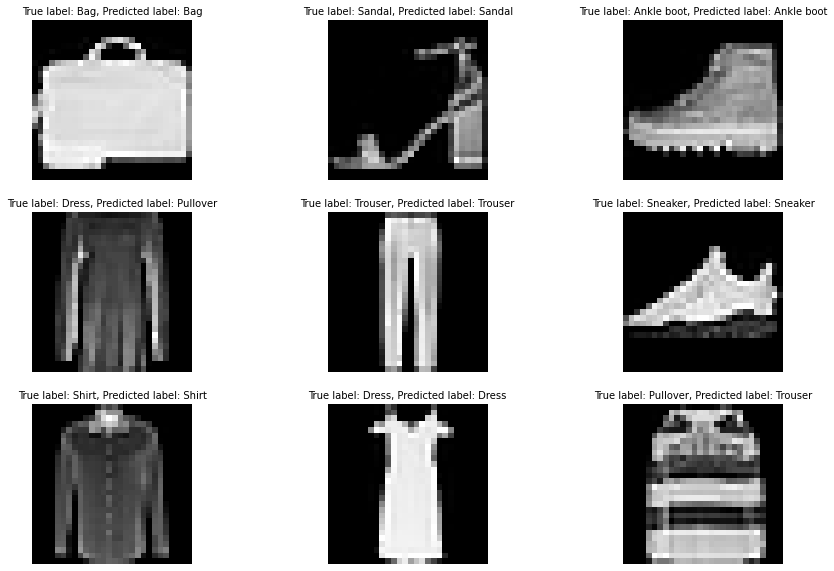

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

c = 0
for i in range(3):
  for j in range(3):  
    index = torch.randint(len(test_data), (1,))[0]
    img, _ = test_data[index]
    ax[i][j].axis(False)
    ax[i][j].imshow(img.squeeze(), cmap="gray")
    tstr = 'True label: '
    tstr += test_data.classes[test_data.targets[index]]
    tstr += ', Predicted label: '
    y_pred = nn.model(test_data.data[index])
    tstr += test_data.classes[y_pred.argmax()]
    ax[i][j].set_title(tstr, fontsize = 10)

fig.show()